In [2]:
%matplotlib qt
#inline
import os
import os.path as op
import mne
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)
from mne.stats import f_threshold_mway_rm, f_mway_rm, fdr_correction,bonferroni_correction
from mne.channels import find_ch_adjacency
from mne.stats import spatio_temporal_cluster_test, permutation_t_test
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#leading preprocessed eeg
list_subj = ['sub-001', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-008', 'sub-009',
             'sub-010', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017']

# define evoked for each condition
# 437 points for 1700 ms
evoked_74 = np.zeros((14,62,437))
evoked_75 = np.zeros((14,62,437))
evoked_76 = np.zeros((14,62,437))
idx =  0
for i in list_subj:
    examples_dir = "PDM_data\\"+i+"\\sourcedata-eeg_outside-MRT\\eeg";
    epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");
    epochs.info['bads'] = []
    #resample epochs.resample(128)
    evoked_74[idx] = epochs['74'].average().data
    evoked_75[idx] = epochs['75'].average().data
    evoked_76[idx] = epochs['76'].average().data
    
    idx = idx + 1

Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-001\sourcedata-eeg_outside-MRT\eeg\sub-001_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-001\sourcedata-eeg_outside-MRT\eeg\sub-001_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
275 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-003\sourcedata-eeg_outside-MRT\eeg\sub-003_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-003\sourcedata-eeg_outside-MRT\eeg\sub-003_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
280 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-004\sourcedata-eeg_outside-MRT\eeg\sub-004_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-004\sourcedata-eeg_outside-MRT\eeg\sub-004_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
261 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-005\sourcedata-eeg_outside-MRT\eeg\sub-005_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-005\sourcedata-eeg_outside-MRT\eeg\sub-005_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
237 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-006\sourcedata-eeg_outside-MRT\eeg\sub-006_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-006\sourcedata-eeg_outside-MRT\eeg\sub-006_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
271 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-008\sourcedata-eeg_outside-MRT\eeg\sub-008_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-008\sourcedata-eeg_outside-MRT\eeg\sub-008_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
273 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-009\sourcedata-eeg_outside-MRT\eeg\sub-009_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-009\sourcedata-eeg_outside-MRT\eeg\sub-009_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
251 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-010\sourcedata-eeg_outside-MRT\eeg\sub-010_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-010\sourcedata-eeg_outside-MRT\eeg\sub-010_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
275 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-012\sourcedata-eeg_outside-MRT\eeg\sub-012_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-012\sourcedata-eeg_outside-MRT\eeg\sub-012_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
273 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-013\sourcedata-eeg_outside-MRT\eeg\sub-013_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-013\sourcedata-eeg_outside-MRT\eeg\sub-013_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
244 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-014\sourcedata-eeg_outside-MRT\eeg\sub-014_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
263 matching events found


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-014\sourcedata-eeg_outside-MRT\eeg\sub-014_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-015\sourcedata-eeg_outside-MRT\eeg\sub-015_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-015\sourcedata-eeg_outside-MRT\eeg\sub-015_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


257 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-016\sourcedata-eeg_outside-MRT\eeg\sub-016_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
245 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-016\sourcedata-eeg_outside-MRT\eeg\sub-016_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-017\sourcedata-eeg_outside-MRT\eeg\sub-017_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-3-207133ead15d>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-017\sourcedata-eeg_outside-MRT\eeg\sub-017_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
251 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated


## topology map power

In [120]:
#define frequencies of interest
freqs = np.arange(4, 30, 1)  
#n_cycles =freqs/2
n_cycles =np.arange(3, 16, 0.5)
n_freqs = len(freqs)

In [148]:
list_subj = ['sub-001', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-008', 'sub-009',
             'sub-010', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017']

# define evoked for each condition
# 437 points for 1700 ms
vawelet_74 = np.zeros((14,62,n_freqs,437))
vawelet_75 = np.zeros((14,62,n_freqs,437))
vawelet_76 = np.zeros((14,62,n_freqs,437))

idx =  0
for i in list_subj:
    examples_dir = "PDM_data\\eeg_outside-MRT\\"+i+"\\sourcedata-eeg_outside-MRT\\eeg";
    epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");
    #this code very important
    epochs.info['bads'] = []

    #define frequencies of interest
    
    #74
    power = tfr_morlet(epochs['74'], freqs, n_cycles=n_cycles, average = False,
                              return_itc=False)
    power = power.average()
    vawelet_74[idx] = power.data
    
    
    #75
    power = tfr_morlet(epochs['75'], freqs, n_cycles=n_cycles, average = False,
                              return_itc=False)
    power = power.average()
    vawelet_75[idx] = power.data
    
    #76
    power = tfr_morlet(epochs['76'], freqs, n_cycles=n_cycles, average = False,
                              return_itc=False)
    power = power.average()
    vawelet_76[idx] = power.data
    
    
    idx = idx + 1

Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-001\sourcedata-eeg_outside-MRT\eeg\sub-001_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-001\sourcedata-eeg_outside-MRT\eeg\sub-001_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
275 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-003\sourcedata-eeg_outside-MRT\eeg\sub-003_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-003\sourcedata-eeg_outside-MRT\eeg\sub-003_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
280 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-004\sourcedata-eeg_outside-MRT\eeg\sub-004_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-004\sourcedata-eeg_outside-MRT\eeg\sub-004_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
261 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-005\sourcedata-eeg_outside-MRT\eeg\sub-005_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-005\sourcedata-eeg_outside-MRT\eeg\sub-005_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
237 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-006\sourcedata-eeg_outside-MRT\eeg\sub-006_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-006\sourcedata-eeg_outside-MRT\eeg\sub-006_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
271 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-008\sourcedata-eeg_outside-MRT\eeg\sub-008_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-008\sourcedata-eeg_outside-MRT\eeg\sub-008_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
273 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-009\sourcedata-eeg_outside-MRT\eeg\sub-009_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
251 matching events found
Applying baseline correction (mode: mean)


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-009\sourcedata-eeg_outside-MRT\eeg\sub-009_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-010\sourcedata-eeg_outside-MRT\eeg\sub-010_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-010\sourcedata-eeg_outside-MRT\eeg\sub-010_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
275 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-012\sourcedata-eeg_outside-MRT\eeg\sub-012_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-012\sourcedata-eeg_outside-MRT\eeg\sub-012_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
273 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-013\sourcedata-eeg_outside-MRT\eeg\sub-013_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-013\sourcedata-eeg_outside-MRT\eeg\sub-013_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
244 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-014\sourcedata-eeg_outside-MRT\eeg\sub-014_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-014\sourcedata-eeg_outside-MRT\eeg\sub-014_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
263 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-015\sourcedata-eeg_outside-MRT\eeg\sub-015_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-015\sourcedata-eeg_outside-MRT\eeg\sub-015_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
257 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-016\sourcedata-eeg_outside-MRT\eeg\sub-016_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
245 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-016\sourcedata-eeg_outside-MRT\eeg\sub-016_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
Not setting metadata
Reading D:\PhD\PDM_data\eeg_outside-MRT\sub-017\sourcedata-eeg_outside-MRT\eeg\sub-017_prerprocessed.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available


<ipython-input-148-cf799d4369f9>:13: RuntimeWarning: This filename (D:\PhD\PDM_data\eeg_outside-MRT\sub-017\sourcedata-eeg_outside-MRT\eeg\sub-017_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(examples_dir + "\\"+ i + "_prerprocessed.fif");


Not setting metadata
Not setting metadata
251 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
Not setting metadata
Not setting metadata


In [211]:
power_74 = vawelet_74.mean(axis=0)[:,4:9,:].mean(axis = 1)
power_75 = vawelet_75.mean(axis=0)[:,4:9,:].mean(axis = 1)
power_76 = vawelet_76.mean(axis=0)[:,4:9,:].mean(axis = 1)

In [212]:
power_contra = np.zeros((62,437))
power_neut   = np.zeros((62,437))
power_ipsi   = np.zeros((62,437))

In [251]:
#defining contralateral and neutral activity
i =0
for ch in epochs.info['ch_names']:
    if 'z' in ch:
        power_contra[i]  = np.array((power_74[i,:],power_75[i,:])).mean(axis = 0)
        power_neut[i]    = power_76[i,:] 
        power_ipsi[i]  = np.array((power_74[i,:],power_75[i,:])).mean(axis = 0)
    elif i%2==0:
        power_contra[i]  = np.array((power_74[i+1,:],power_75[i,:])).mean(axis = 0)
        power_neut[i]    = np.array((power_76[i,:],power_76[i+1,:])).mean(axis = 0)
        power_ipsi[i]  = np.array((power_74[i,:],power_75[i+1,:])).mean(axis = 0)
    elif i%2!=0:
        power_contra[i]  = np.array((power_74[i,:],power_75[i-1,:])).mean(axis = 0)
        power_neut[i]    = np.array((power_76[i,:],power_76[i-1,:])).mean(axis = 0)
        power_ipsi[i]  = np.array((power_74[i-1,:],power_75[i,:])).mean(axis = 0)
    i+=1

In [ ]:
#the difference on time window
topo_power_contra = (power_contra-power_neut)[:,342:368].mean(axis=1).reshape(62,1)

In [199]:
#the difference on time window
topo_power_ipsi = (power_ipsi-power_neut)[:,321:347].mean(axis=1).reshape(62,1)

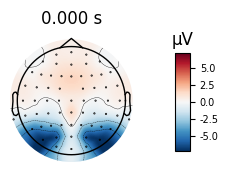

In [266]:
%matplotlib qt
evoked_topo_power_contra=mne.EvokedArray(100000*topo_power_contra, epochs.info)
evoked_topo_power_contra.plot_topomap(0)

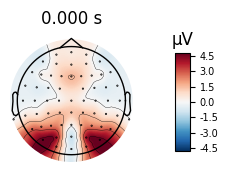

In [271]:
mne.EvokedArray(100000*topo_power_ipsi, epochs.info).plot_topomap(0)